# Decision Tree Classification with Python and Scikit-Learn

# Classification and Regression Trees (CART)


In [48]:
import pandas as pd
import numpy as np

#For Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
data=pd.read_csv('car data.data')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
#Lets See the summary of the dataset and and Columns name 
data.shape

(1727, 7)

In [15]:
#First lets set the feature name

In [16]:
data.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [19]:
data.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [20]:
#Lets Use ordinal Encoding to set the number
from sklearn.preprocessing import OrdinalEncoder

In [24]:
ord_enc=OrdinalEncoder(categories=[['low','med','high','vhigh']])
df2=ord_enc.fit_transform(data[['buying']])
print(df2)
data['buying']=df2

[[3.]
 [3.]
 [3.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
ord_enc=OrdinalEncoder(categories=[['low','med','high','vhigh']])
df2=ord_enc.fit_transform(data[['maint']])
df2
data['maint']=df2

In [34]:
data.safety.unique()

array(['med', 'high', 'low'], dtype=object)

In [33]:
ord_enc=OrdinalEncoder(categories=[['small', 'med', 'big']])
df2=ord_enc.fit_transform(data[['lug_boot']])
df2
data['lug_boot']=df2

In [41]:
ord_enc=OrdinalEncoder(categories=[['low','med','high']])
df2=ord_enc.fit_transform(data[['safety']])
df2
data['safety']=df2

In [72]:
ord_enc=OrdinalEncoder(categories=[['2', '3', '4', '5more']])
df1=ord_enc.fit_transform(data[['doors']])
df1
data['doors']=df1

In [96]:
ord_enc=OrdinalEncoder(categories=[['2', '4', 'more']])
df1=ord_enc.fit_transform(data[['persons']])
df1
data['persons']=df1

In [73]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,2,0.0,1.0,unacc
1,3.0,3.0,0.0,2,0.0,2.0,unacc
2,3.0,3.0,0.0,2,1.0,0.0,unacc
3,3.0,3.0,0.0,2,1.0,1.0,unacc
4,3.0,3.0,0.0,2,1.0,2.0,unacc


In [43]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [45]:
data.describe()

,buying,maint,lug_boot,safety
count,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.499131,1.499131,1.000579,1.000579
std,1.118098,1.118098,0.816615,0.816615
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,2.000000,2.000000


In [46]:
#Lets check MultiCollinearity Problem by heat map

In [47]:
df_corr=data.corr().abs()

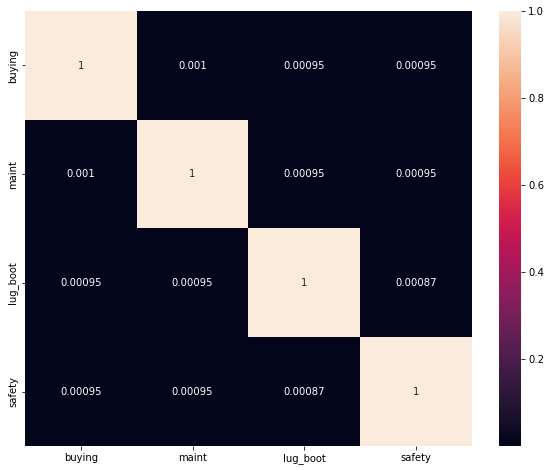

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [52]:
#There is not a multilinearity Problem we are goo to go.

In [53]:
#Lets assign the label name and feature name

In [128]:
x=data.drop(columns=['class'])
y=data['class']

In [129]:
#Lets do Train Train Split for train test split we have to import

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=94255)

In [139]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("======================Training Score=============")
        print("Accuracy Score===> ",accuracy_score(y_train,y_pred)*100)
    elif train== False:
        pred=cnn.predict(x_test)
        print("========================Testing Score=============")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report ==> ",classification_report(y_test,pred))

In [140]:
#Lets Create Model. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
cnn=DecisionTreeClassifier()

In [142]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [143]:
#Our  model is created lets check accuracy score

In [144]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)

======================Training Score=============
Accuracy Score===>  100.0


In [145]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

========================Testing Score=============
Accuracy Score==>   98.55491329479769
Classification Report ==>                precision    recall  f1-score   support

         acc       0.96      0.97      0.96        67
        good       0.89      0.89      0.89        18
       unacc       1.00      1.00      1.00       249
       vgood       1.00      1.00      1.00        12

    accuracy                           0.99       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.99      0.99      0.99       346



In [146]:
#Might be our model is overfitted
#Lets do some tuning by hyperparameter tuning

In [147]:
#lets import hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [149]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,15],
           'min_samples_leaf':[4,15],
           'min_samples_split':[3,12],
           'max_leaf_nodes':[2,15]}

In [150]:
grid_search=GridSearchCV(estimator=cnn,param_grid=param_grid,cv=7)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [152]:
cnn=DecisionTreeClassifier(criterion='entropy',max_depth=15,max_leaf_nodes=15,min_samples_leaf=4,min_samples_split=3)

In [153]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=15,
                       min_samples_leaf=4, min_samples_split=3)

In [154]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)

======================Training Score=============
Accuracy Score===>  93.12092686459088


In [155]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

========================Testing Score=============
Accuracy Score==>   94.79768786127167
Classification Report ==>                precision    recall  f1-score   support

         acc       0.90      0.85      0.88        67
        good       0.73      0.89      0.80        18
       unacc       0.99      0.98      0.99       249
       vgood       0.73      0.92      0.81        12

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.95      0.95      0.95       346



In [161]:
#Save Model
import pickle
pickle.dump('model',open('Decision Tree','wb'))

In [156]:
#Student of DataScience
#Student of DataTrained - Saurav
#Date- 15-09-2022
#Time - 10:46